In [1]:
# use these links to do so:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os

In [2]:
Churn_data = pd.read_csv('Churn.csv')

In [4]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Understanding the data

In [7]:
Churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
Churn_data=Churn_data.drop('customerID',axis=1)

In [9]:
Churn_data[Churn_data.iloc[:,:]==' '] = np.NaN

In [10]:
Churn_data['TotalCharges'] = Churn_data['TotalCharges'].astype(float)
Churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
Churn_data=Churn_data.fillna(Churn_data.mean())

In [12]:
Churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Manipulation

In [15]:
Churn_data_col=Churn_data.columns
Churn_data_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
le = preprocessing.LabelEncoder()
for i in Churn_data_col:
    Churn_data[i]=le.fit_transform(Churn_data[i])

In [17]:
Churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [20]:
X=Churn_data.iloc[:,0:-1]
y=Churn_data.iloc[:,-1]

In [21]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]], dtype=int64)

In [22]:
print(features[0:5,:])

[[   1    0  142   74]
 [  34    1  498 3624]
 [   2    0  436  536]
 [  45    1  266 3570]
 [   2    0  729  674]]


In [23]:
np.set_printoptions(precision=3) 
print(fit.scores_)

[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04 4.572e+05]


In [24]:
c=['Partner','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup','TechSupport', 'StreamingTV',
       'StreamingMovies','PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [26]:
x=Churn_data.loc[:,c]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

In [27]:
X

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

# Data Visualization

In [28]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


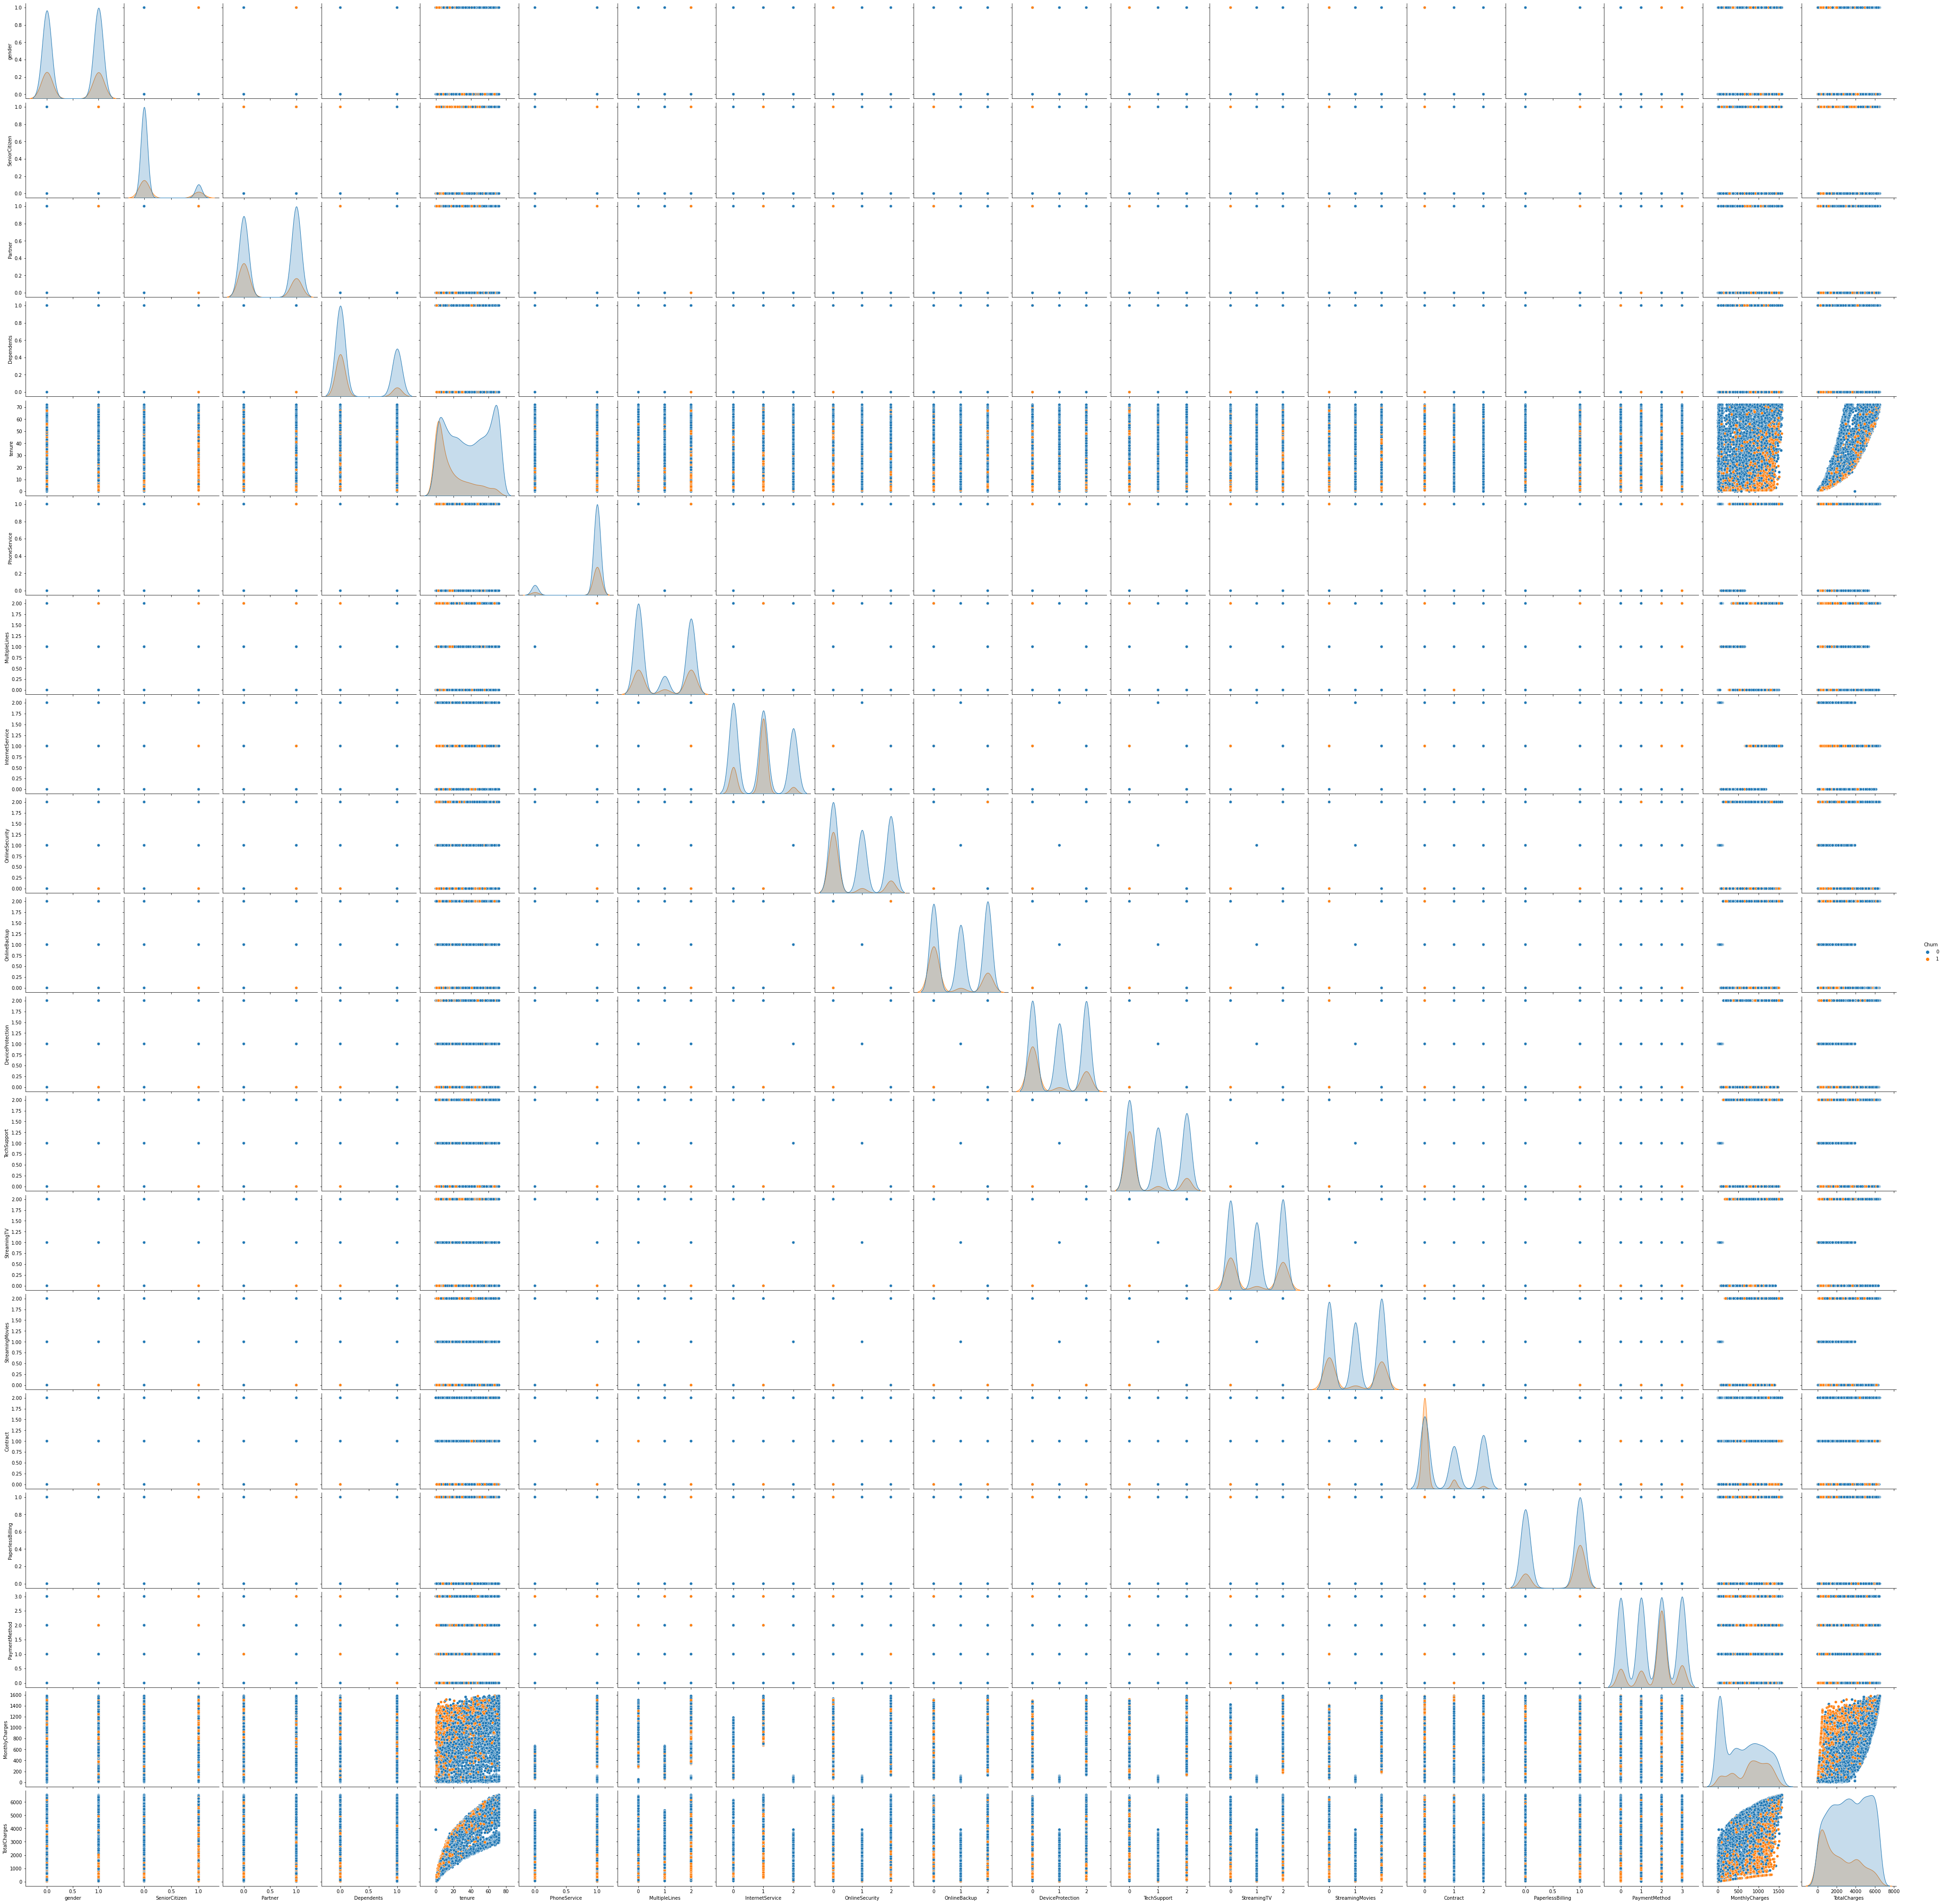

In [30]:
sns.pairplot(Churn_data, hue="Churn", size=3)

# Implement Machine Learning Models

In [31]:
#APPLYING MODELS ON UNBALENCED CLASS DATA
#SUPPORT VECTOR MACHINE
f1 = []
acc = []
n = 50
print("SVM:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train) 
    ypred = svm.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

SVM:
Avg F1-Score 0.7803851395217022
Max F1-Score 0.8093212155816994
Min F1-Score 0.7525387917750012
Avg Accuracy 0.7980269694819019
Max Accuracy 0.8239886444286728
Min Accuracy 0.7757274662881476


In [32]:
#LOGISTIC
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7918475808790126
Max F1-Score 0.8106847798898256
Min F1-Score 0.7525387917750012
Avg Accuracy 0.8024149297817391
Max Accuracy 0.8239886444286728
Min Accuracy 0.7757274662881476


In [33]:
#RANDOM FOREST
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.7896400274537425
Max F1-Score 0.8106847798898256
Min F1-Score 0.7508000297468489
Avg Accuracy 0.8000412411994154
Max Accuracy 0.8239886444286728
Min Accuracy 0.7629524485450674


In [39]:
#  OUR DATA IS UNBALENCE HENCE BALENCING THE DATA USING SMOTE

a = np.array(Churn_data.iloc[:, Churn_data.columns != 'Churn'])
b = np.array(Churn_data.iloc[:, Churn_data.columns == 'Churn'])
print('Shape of X: {}'.format(a.shape))
print('Shape of y: {}'.format(b.shape))

Shape of X: (7043, 19)
Shape of y: (7043, 1)


In [46]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4930, 19)
Number transactions y_train dataset:  (4930,)
Number transactions X_test dataset:  (2113, 19)
Number transactions y_test dataset:  (2113,)


In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))



Before OverSampling, counts of label '1': 1316
Before OverSampling, counts of label '0': 3614 



In [68]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))




After OverSampling, the shape of train_X: (8250, 19)
After OverSampling, the shape of train_y: (8250,) 

After OverSampling, counts of label '1': 4125
After OverSampling, counts of label '0': 4125


In [69]:
#NAIVE BAYES
n = 50
print("Naive Bayes:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    nb = GaussianNB()
    nb.fit(X_train_res, y_train_res)
    y2pred = nb.predict(X_test)
    f1.append(f1_score(y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(y_test, y2pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Naive Bayes:
Avg F1-Score 0.7834674946187967
Max F1-Score 0.8106847798898256
Min F1-Score 0.7353504933769428
Avg Accuracy 0.7898829600484838
Max Accuracy 0.8239886444286728
Min Accuracy 0.7203690560681334


In [71]:
#MULTI LAYER PERCEPTRON
n = 50
print("MLP:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = MLPClassifier(solver='sgd', alpha=0.00001, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
    clf.fit(X_train_res, y_train_res)
    y3pred = clf.predict(X_test)
    f1.append(f1_score(y_test, y3pred, average='weighted'))
    acc.append(accuracy_score(y_test, y3pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

MLP:
Avg F1-Score 0.7825518633435783
Max F1-Score 0.8106847798898256
Min F1-Score 0.7353504933769428
Avg Accuracy 0.786524439242612
Max Accuracy 0.8239886444286728
Min Accuracy 0.7203690560681334


In [72]:
# NOW APPLYING MODEL TO BALENCED CLASS DATA.
f1 = []
acc = []
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train_res, y_train_res)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.954661111085949
Max F1-Score 0.9636607045638478
Min F1-Score 0.9408946770450851
Avg Accuracy 0.9545635202271114
Max Accuracy 0.9638041163946061
Min Accuracy 0.9403832505322924


# Model Evaluation

accuracy:   95.032
[[967  41]
 [ 29 372]]


Text(26.5, 0.5, 'true values')

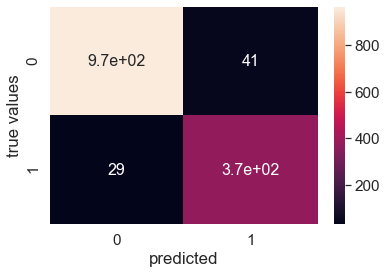

In [73]:
#RANDOM FOREST
score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,ypred)
print('AUC: %.3f' % auc)

AUC: 0.944


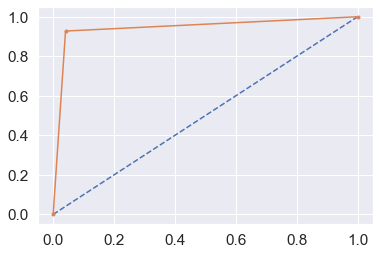

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# Final Conclusions

In [76]:
# I HAVE USED 5 CLASSIFIERS FOR CLASSIFICATION
 #RANDOM FOREST,LOGISTIC,MLP,SVM,,NAIVE BAYES
# OUR DATA CONSIST OF UN BALENCE CLASS
#82%ACCURACY SCORE WITHOUT BALENCING THE DATA USING RANDOM FOREST 
#AFTER BALENCING THE CLASS USING SMOTE WE GOT MUCH BETTER RESULTS
#RANDOM FOREST OUT PERFORMS ALL THE MODELS WITH 93% ACCURACY & 0.92 AUC SCORE.
#ACCURACY CAN BE FURTHER INCREASED USING PARAMETER TUNING.